<a href="https://colab.research.google.com/github/Archin0/PCVK_Sem5/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Langkah 1: Menghubungkan Google Drive dan Membaca Gambar

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Tampilan dengan Matplotlib (BGR):


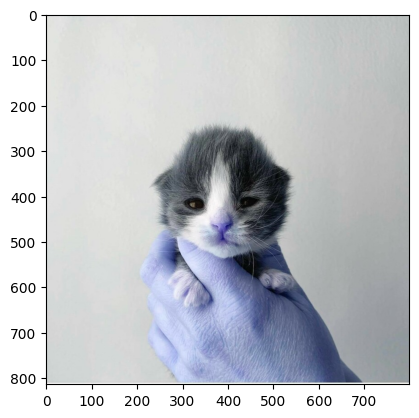

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# Ganti dengan path file gambar Anda di Google Drive
file_path = '/content/drive/MyDrive/PCVK/ilham.jpg'
img = cv.imread(file_path)

# Menampilkan gambar menggunakan matplotlib (warna akan salah karena BGR)
print("Tampilan dengan Matplotlib (BGR):")
plt.imshow(img)
plt.show() # Menggunakan plt.show() untuk memisahkan output

## Langkah 2 & 3: Manipulasi Dasar Gambar (Warna, Grayscale, Resize, Flip)

Tampilan dengan Matplotlib setelah konversi ke RGB:


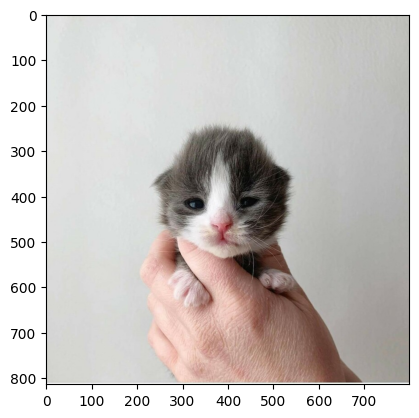

In [4]:
# Konversi dari BGR ke RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

print("Tampilan dengan Matplotlib setelah konversi ke RGB:")
plt.imshow(img_rgb)
plt.show()

Tampilan Grayscale (default colormap):


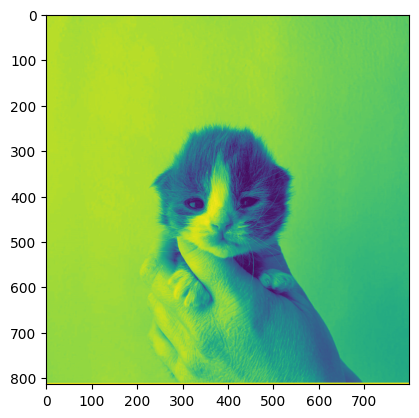

Tampilan Grayscale (colormap 'gray'):


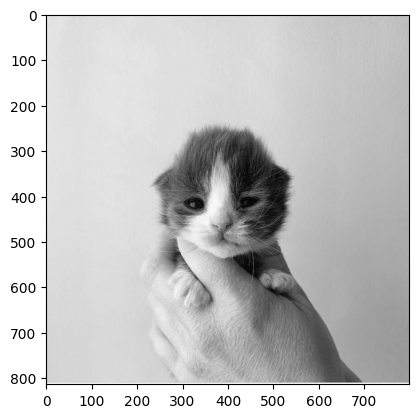

Tampilan Grayscale (colormap 'magma'):


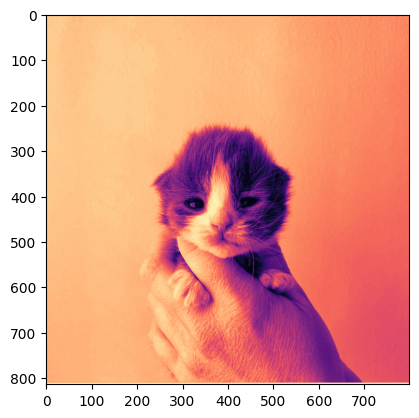

In [5]:
# Membaca gambar langsung sebagai grayscale
img_gray = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

print("Tampilan Grayscale (default colormap):")
plt.imshow(img_gray)
plt.show()

print("Tampilan Grayscale (colormap 'gray'):")
plt.imshow(img_gray, cmap='gray')
plt.show()

print("Tampilan Grayscale (colormap 'magma'):")
plt.imshow(img_gray, cmap='magma')
plt.show()

Gambar setelah di-resize:


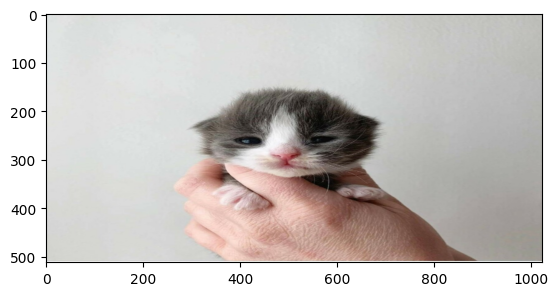

Gambar setelah dibalik (flipped):


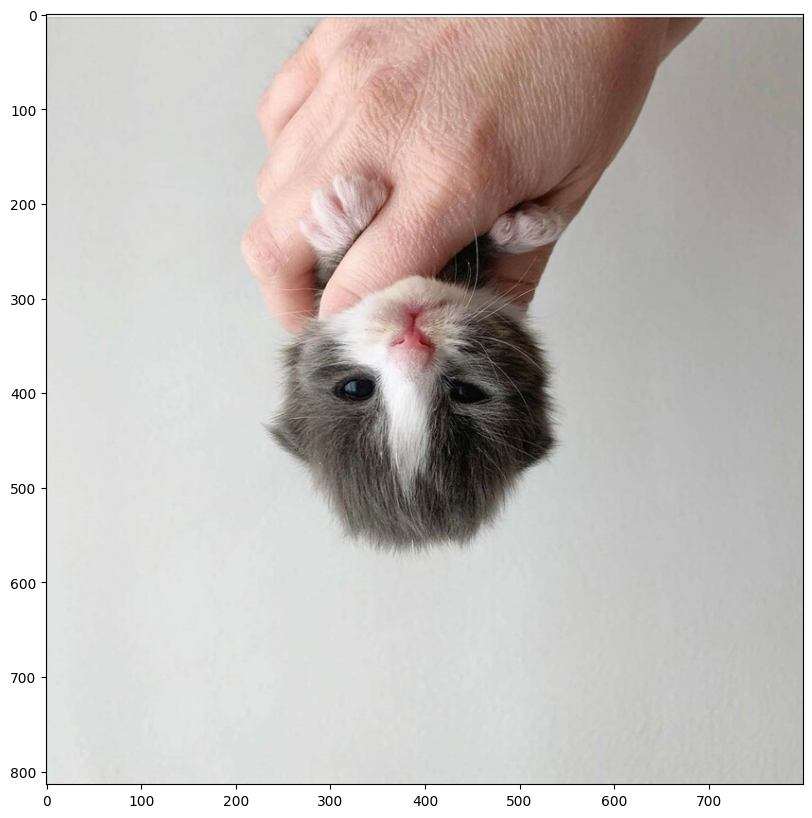

In [6]:
# Resize gambar RGB ke ukuran 1024x512 piksel
img_resized = cv.resize(img_rgb, (1024, 512))

# Membalik gambar RGB secara vertikal (flip code 0)
img_flipped = cv.flip(img_rgb, 0)

print("Gambar setelah di-resize:")
plt.imshow(img_resized)
plt.show()

print("Gambar setelah dibalik (flipped):")
# Mengatur ukuran kanvas tampilan agar lebih besar
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(img_flipped)
plt.show()

## Langkah 4: Menggambar Bentuk Geometris

Gambar HITAM:


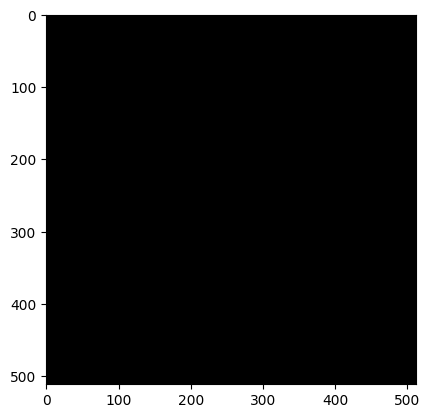

Gambar HITAM dengan persegi panjang hijau:


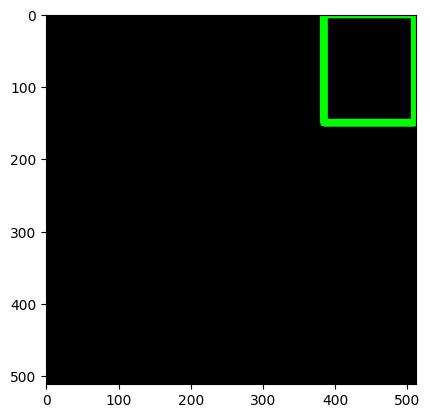

Ditambah persegi biru:


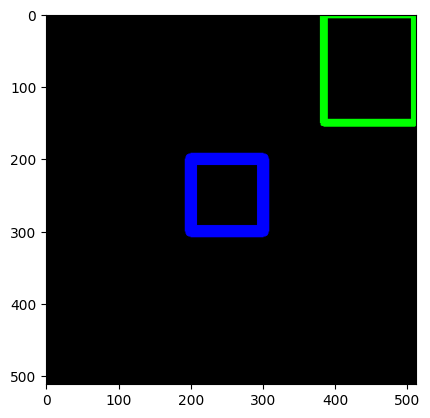

Ditambah lingkaran merah:


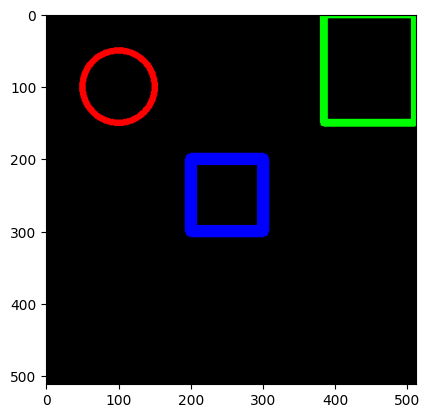

Ditambah garis diagonal biru:


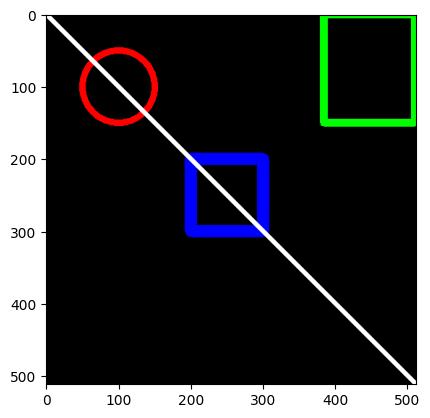

Ditambah teks:


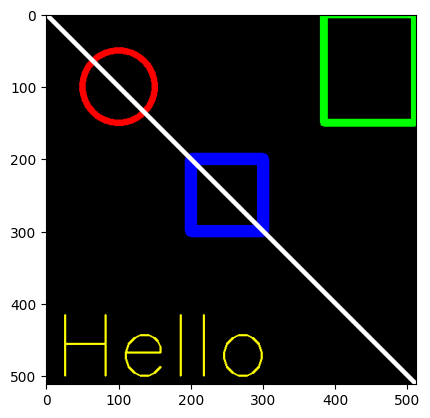

In [9]:
# Membuat gambar hitam ukuran 512x512
black_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)
print("Gambar HITAM:")
plt.imshow(black_img)
plt.show()

# Menggambar persegi panjang hijau (ketebalan 10)
cv.rectangle(black_img, pt1=(384,0), pt2=(510,150), color=(0,255,0), thickness=10)
print("Gambar HITAM dengan persegi panjang hijau:")
plt.imshow(black_img)
plt.show()

# Menggambar persegi biru (ketebalan 15)
cv.rectangle(black_img, pt1=(200,200), pt2=(300,300), color=(0,0,255), thickness=15)
print("Ditambah persegi biru:")
plt.imshow(black_img)
plt.show()

# Menggambar lingkaran merah (ketebalan 8)
cv.circle(black_img, center=(100,100), radius=50, color=(255,0,0), thickness=8)
print("Ditambah lingkaran merah:")
plt.imshow(black_img)
plt.show()

# Menggambar garis diagonal putih (ketebalan 5)
cv.line(black_img, pt1=(0,0), pt2=(512,512), color=(255,255,255), thickness=5)
print("Ditambah garis diagonal biru:")
plt.imshow(black_img)
plt.show()

# Menambahkan teks
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img, text='Hello', org=(10,500), fontFace=font, fontScale=4, color=(255,255,0), thickness=2, lineType=cv.LINE_AA)
print("Ditambah teks:")
plt.imshow(black_img)
plt.show()

Gambar HITAM 2:


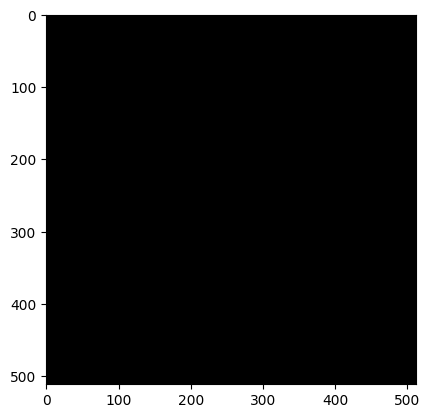

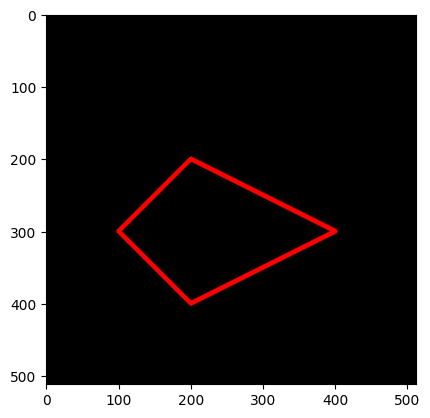

In [13]:
# Membuat gambar hitam ukuran 512x512
black_img2 = np.zeros(shape=(512, 512, 3), dtype=np.int32)
print("Gambar HITAM 2:")
plt.imshow(black_img2)
plt.show()

vertices = np.array([[100,300],[200,200],[400,300],[200,400]], dtype=np.int32)
vertices

pts = vertices.reshape((-1,1,2))

cv.polylines(black_img2, [pts], isClosed=True, color=(255,0,0), thickness=5)
plt.imshow(black_img2)
plt.show()

# Tugas Praktikum

1. Pengaruh figsize: figsize pada plt.figure(figsize=(w,h)) hanya mengubah ukuran tampilan (kanvas) plot di output Anda, bukan resolusi atau jumlah piksel gambar aslinya. Gambar akan terlihat lebih besar atau kecil, tetapi dimensinya (misal: 640x480 piksel) tetap sama.


2. Menampilkan Channel Tertentu: Untuk menampilkan hanya channel Red-Blue atau Green-Blue, kita salin gambar aslinya lalu atur channel yang tidak diinginkan menjadi 0. Ingat, urutan channel di OpenCV adalah BGR (Indeks: 0=B, 1=G, 2=R).

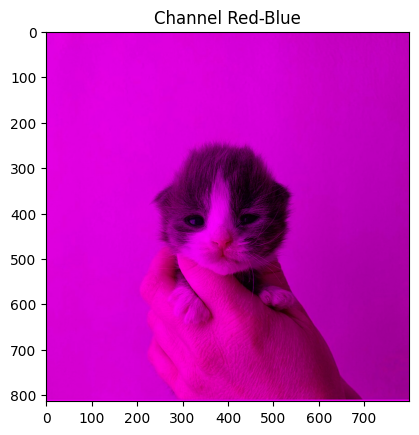

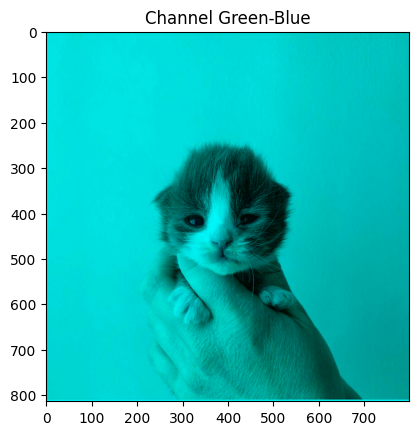

In [14]:
img_rgb = cv.cvtColor(cv.imread(file_path), cv.COLOR_BGR2RGB)

# Tampilkan Red-Blue (nolkan channel Green)
img_rb = img_rgb.copy()
img_rb[:, :, 1] = 0 # Indeks 1 adalah Green
plt.imshow(img_rb)
plt.title("Channel Red-Blue")
plt.show()

# Tampilkan Green-Blue (nolkan channel Red)
img_gb = img_rgb.copy()
img_gb[:, :, 0] = 0 # Indeks 0 adalah Red
plt.imshow(img_gb)
plt.title("Channel Green-Blue")
plt.show()

3. Memotong (Slicing) Gambar: Gunakan slicing pada array NumPy untuk mengambil bagian tertentu dari gambar. Formatnya adalah
[baris_awal:baris_akhir, kolom_awal:kolom_akhir]

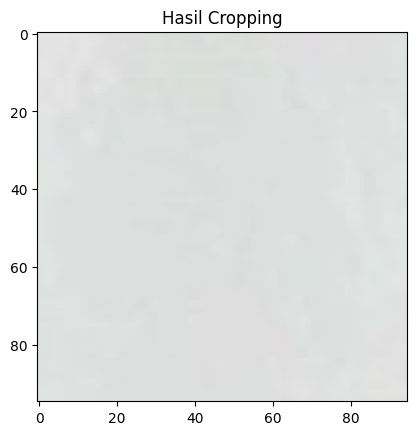

In [15]:
# Tampilkan baris 20-115 dan kolom 25-120
img_cropped = img_rgb[20:115, 25:120]
plt.imshow(img_cropped)
plt.title("Hasil Cropping")
plt.show()

4. Slicing dengan Channel: Untuk mengambil channel Red saja dari potongan gambar, tambahkan indeks channel di akhir slicing.

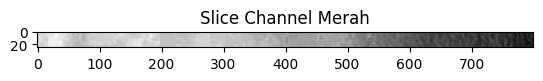

In [16]:
# Ambil baris 5-30, semua kolom, hanya channel Red (indeks 0)
red_channel_slice = img_rgb[5:30, :, 0]
plt.imshow(red_channel_slice, cmap='gray') # Tampilkan dengan colormap agar terlihat
plt.title("Slice Channel Merah")
plt.show()

5. Membuat 5 Kotak Acak: Gunakan perulangan dan np.random.randint untuk menghasilkan koordinat, ukuran, dan warna acak.

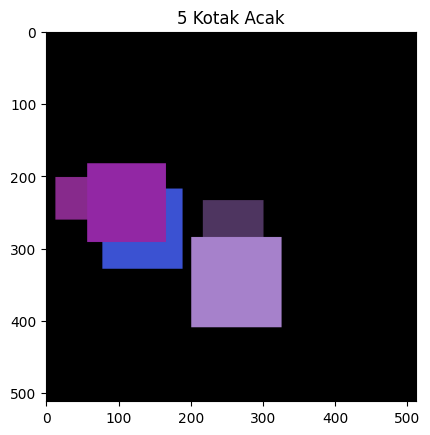

In [17]:
canvas = np.zeros((512, 512, 3), dtype=np.uint8)
for i in range(5):
    # Koordinat pojok kiri atas acak
    pt1_x = np.random.randint(0, 400)
    pt1_y = np.random.randint(0, 400)
    # Ukuran acak
    size = np.random.randint(50, 150)
    pt2_x = pt1_x + size
    pt2_y = pt1_y + size
    # Warna acak
    color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))

    cv.rectangle(canvas, (pt1_x, pt1_y), (pt2_x, pt2_y), color, thickness=-1) # thickness -1 untuk mengisi kotak

plt.imshow(canvas)
plt.title("5 Kotak Acak")
plt.show()

6. Menampilkan Gambar dengan Posisi Terbalik
Untuk membalik gambar, Anda dapat menggunakan fungsi cv.flip() dari OpenCV.

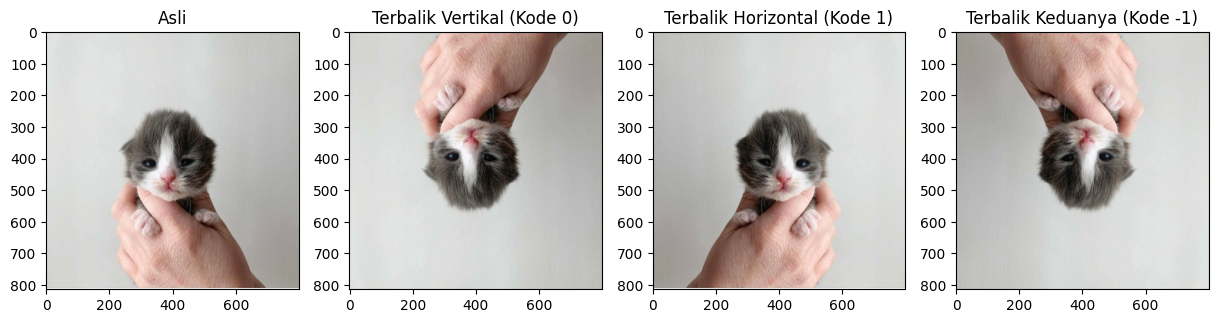

In [18]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Membalik gambar
img_flipped_vertical = cv.flip(img_rgb, 0)
img_flipped_horizontal = cv.flip(img_rgb, 1)
img_flipped_both = cv.flip(img_rgb, -1)

# Menampilkan semua hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title("Asli")

plt.subplot(1, 4, 2)
plt.imshow(img_flipped_vertical)
plt.title("Terbalik Vertikal (Kode 0)")

plt.subplot(1, 4, 3)
plt.imshow(img_flipped_horizontal)
plt.title("Terbalik Horizontal (Kode 1)")

plt.subplot(1, 4, 4)
plt.imshow(img_flipped_both)
plt.title("Terbalik Keduanya (Kode -1)")

plt.show()

8 & 9. Menggambar pada Channel Tertentu dan Menambah Teks
Tugas ini menggabungkan dua permintaan: menggambar persegi panjang di sudut kiri bawah pada channel warna Biru, lalu menambahkan teks nama file pada gambar tersebut.

Penjelasan:

1.   "Menggambar pada channel B" dapat diartikan secara sederhana sebagai menggambar bentuk berwarna biru murni. Dalam format BGR OpenCV, warna biru murni adalah (255, 0, 0).

2.   Kita akan menentukan area sudut kiri bawah berdasarkan tinggi dan lebar gambar.

3. Kemudian, kita akan menggunakan cv.putText() untuk menulis nama file di atas gambar.

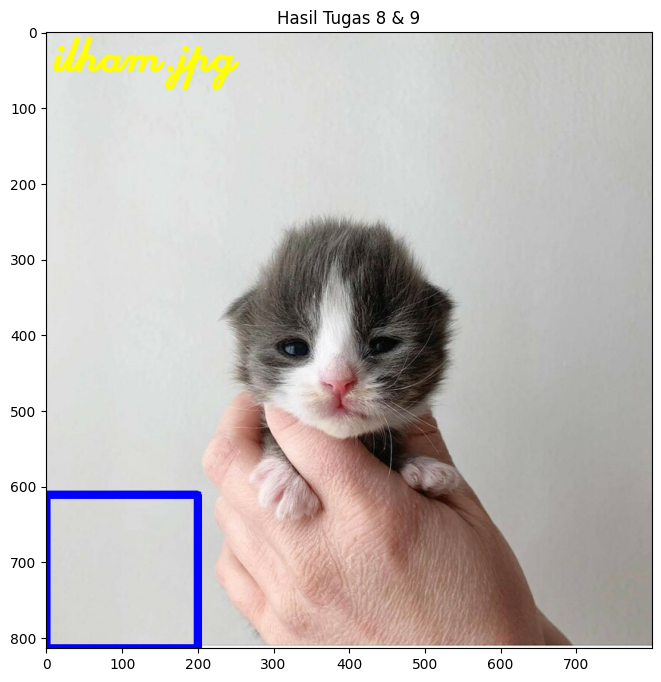

In [21]:
# Ganti dengan path file gambar Anda dari daftar yang diberikan
filename = '/content/drive/MyDrive/PCVK/ilham.jpg'
image = cv.imread(filename)

# --- Tugas 8: Menggambar Persegi Panjang Biru di Sudut Kiri Bawah ---
height, width, _ = image.shape

# Tentukan area sudut kiri bawah (misal: 1/4 dari lebar dan tinggi)
bottom_left_pt1 = (0, height - int(height/4))
bottom_left_pt2 = (int(width/4), height)

# Gambar persegi panjang biru (ingat, OpenCV menggunakan BGR, jadi biru adalah (255,0,0))
cv.rectangle(image, bottom_left_pt1, bottom_left_pt2, color=(255, 0, 0), thickness=10)


# --- Tugas 9: Menambahkan Teks Nama File ---
# Dapatkan nama file saja dari path lengkap
simple_filename = filename.split('/')[-1]

# Tentukan properti teks
font = cv.FONT_HERSHEY_SCRIPT_COMPLEX
font_scale = 2
font_color = (0, 255, 255) # Warna kuning (dalam BGR)
font_thickness = 3
text_position = (10, 50) # Koordinat (x,y) untuk posisi teks

cv.putText(image, simple_filename, text_position, font, font_scale, font_color, font_thickness, cv.LINE_AA)

# Tampilkan hasil akhir (konversi ke RGB agar warna di plot benar)
plt.figure(figsize=(10, 8))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Hasil Tugas 8 & 9")
plt.show()